In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
def sigmoid(z):
    return 1 / (1 + tf.exp(-z))

In [4]:
X = tf.random.uniform((500,1), minval=0, maxval=20, dtype=tf.float32)
y = tf.where(X >= 10, 1.0, 0.0)

In [5]:
w = tf.Variable(tf.zeros([1, 1]))
b = tf.Variable(0.0)

In [6]:
learning_rate = 0.0025
epochs = 10000

In [7]:
n = len(y)
for i in range(1, epochs + 1):
    with tf.GradientTape() as tape:
        z = tf.matmul(X, w) + b
        y_pred = sigmoid(z)
        loss = -tf.reduce_mean(y * tf.math.log(y_pred) + (1 - y) * tf.math.log(1 - y_pred))
    
    gradients = tape.gradient(loss, [w, b])

    w.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    print(f"Epoch {i}, Loss: {loss.numpy()}")

Epoch 1, Loss: 0.6931472420692444
Epoch 2, Loss: 0.6795580387115479
Epoch 3, Loss: 0.6680982708930969
Epoch 4, Loss: 0.6584238409996033
Epoch 5, Loss: 0.6502436995506287
Epoch 6, Loss: 0.6433132290840149
Epoch 7, Loss: 0.6374282240867615
Epoch 8, Loss: 0.6324187517166138
Epoch 9, Loss: 0.6281434297561646
Epoch 10, Loss: 0.624485194683075
Epoch 11, Loss: 0.6213462948799133
Epoch 12, Loss: 0.6186456084251404
Epoch 13, Loss: 0.6163158416748047
Epoch 14, Loss: 0.6143002510070801
Epoch 15, Loss: 0.6125518083572388
Epoch 16, Loss: 0.6110308170318604
Epoch 17, Loss: 0.6097040176391602
Epoch 18, Loss: 0.608543336391449
Epoch 19, Loss: 0.6075249910354614
Epoch 20, Loss: 0.6066288352012634
Epoch 21, Loss: 0.6058380603790283
Epoch 22, Loss: 0.6051378846168518
Epoch 23, Loss: 0.6045159697532654
Epoch 24, Loss: 0.6039618849754333
Epoch 25, Loss: 0.6034664511680603
Epoch 26, Loss: 0.6030218601226807
Epoch 27, Loss: 0.6026214361190796
Epoch 28, Loss: 0.6022594571113586
Epoch 29, Loss: 0.6019309759140

In [8]:
def predict(X):
    z = tf.matmul(X, w) + b
    y_pred = sigmoid(z)
    return tf.round(y_pred)

In [9]:
predictions = predict(X) # Training data

print("Predictions of training data:", predictions.numpy().flatten())
print("Actual labels:", y.numpy().flatten())

Predictions of training data: [0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 1.

In [10]:
correct_predictions = tf.equal(predictions, y)
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))
print(f"Accuracy on training data: {accuracy.numpy() * 100:.2f}%")

Accuracy on training data: 93.40%


In [11]:
X_test_data = tf.random.uniform((100, 1), minval=0, maxval=20, dtype=tf.float32)
y_test_data = tf.where(X_test_data >= 10, 1.0, 0.0)


In [12]:
test_prediction = predict(X_test_data)
print(f"Test prediction: {test_prediction.numpy().flatten()}")
print(f"Actual labels: {y_test_data.numpy().flatten()}")

Test prediction: [1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 0.]
Actual labels: [1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0.]


In [13]:
correct_test_predictions = tf.equal(test_prediction, y_test_data)
accuracy_test_data = tf.reduce_mean(tf.cast(correct_test_predictions, tf.float32))
print(f"Accuracy on test data: {accuracy_test_data.numpy() * 100:.2f}%")

Accuracy on test data: 94.00%


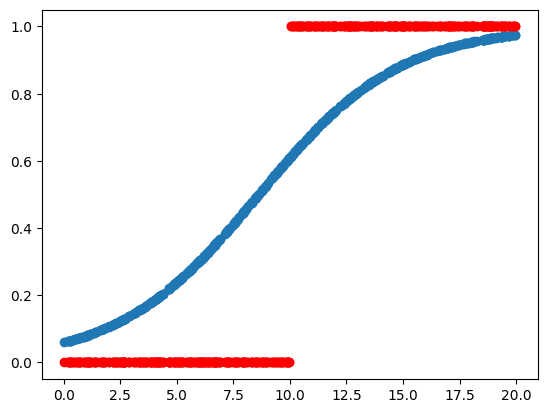

In [19]:
plt.scatter(X, sigmoid(tf.matmul(X, w) + b))
plt.scatter(X, y, color="red")
plt.show()